In [1]:
from sympy import *

x = symbols("x")
y = Function("y")(x)


In [2]:
DE = Eq(y.diff(x, x) + 5 * y.diff(x) + 6 * y, exp(-x))
DE


Eq(6*y(x) + 5*Derivative(y(x), x) + Derivative(y(x), (x, 2)), exp(-x))

In [3]:
dsolve(DE, y, simplify=False)


Eq(y(x), (C1*exp(-2*x) + C2*exp(-x) + 1/2)*exp(-x))

In [4]:
y = Function("y")
dsolve(DE, y(x), ics={y(0): 0, y(x).diff(x).subs(x, 0): 0}, simplify=False)


Eq(y(x), (1/2 - exp(-x) + exp(-2*x)/2)*exp(-x))

In [5]:
# define the function f(x,Y) with Y = [y,z] and z = dy/dx
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp


def f(x, Y):
    y = Y[0]
    z = Y[1]
    dy = z
    dz = -6 * y - 5 * z + 2 * np.exp(-x)
    dY = np.array([dy, dz])
    return dY


In [6]:
# Solve the ODE numerically
sol = solve_ivp(f, [0, 1], np.array([0, 0]), t_eval=np.arange(0, 1, 0.05))


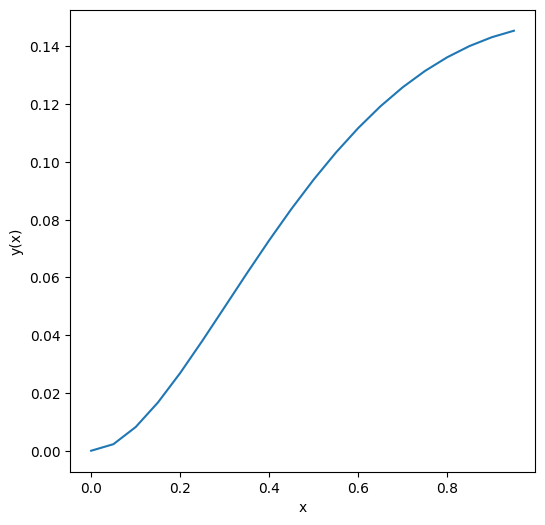

In [7]:
# Plot the solution
plt.figure(figsize=(6, 6))
plt.plot(sol.t, sol.y[0])
plt.xlabel("x")
plt.ylabel("y(x)")
plt.show()
